<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/Costco_next%2C_3%2C_5_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd

In [ ]:
df = pd.read_csv('filtered_data.csv')

In [ ]:
df.set_index('date-5', drop=False, inplace=True)
df

,date-5,open-5,high-5,low-5,close-5,close-4,close-2,Close,BodySize,CandleSize,Doji
date-5,,,,,,,,,,,
2020-06-16,2020-06-16,301.350006,302.739990,299.220001,301.359985,299.609985,299.899994,301.290009,0.009979,3.519989,True
2015-05-07,2015-05-07,144.520004,145.610001,144.009995,144.559998,145.880005,144.070007,142.600006,0.039994,1.600006,True
2016-10-14,2016-10-14,150.179993,151.000000,149.279999,150.149994,148.699997,149.449997,148.970001,0.029999,1.720001,True
2018-03-28,2018-03-28,183.610001,184.619995,181.229996,183.610001,188.429993,182.610001,186.250000,0.000000,3.389999,True
2022-10-18,2022-10-18,473.200012,476.519989,468.829987,473.269989,471.429993,478.179993,499.059998,0.069977,7.690002,True
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,2016-10-27,150.830002,151.460007,149.820007,150.860001,149.759995,146.660004,144.449997,0.029999,1.640000,True
2007-03-06,2007-03-06,55.709999,56.090000,55.160000,55.720001,56.119999,54.340000,52.959999,0.010002,0.930000,True
2004-07-28,2004-07-28,41.209999,41.500000,40.349998,41.209999,41.799999,41.099998,41.150002,0.000000,1.150002,True


In [ ]:
import pandas as pd

# Exclude the specified columns
columns_to_exclude = ['close-4', 'close-2', 'Close', 'Doji', 'BodySize', 'CandleSize']

# Select only the numeric columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude and pd.api.types.is_numeric_dtype(df[col])]

# Calculate the minimum and maximum values for the selected numeric columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

# Display the updated DataFrame
df


,date-5,open-5,high-5,low-5,close-5,close-4,close-2,Close,BodySize,CandleSize,Doji,Row_Min,Row_Max
date-5,,,,,,,,,,,,,
2020-06-16,2020-06-16,301.350006,302.739990,299.220001,301.359985,299.609985,299.899994,301.290009,0.009979,3.519989,True,299.220001,302.739990
2015-05-07,2015-05-07,144.520004,145.610001,144.009995,144.559998,145.880005,144.070007,142.600006,0.039994,1.600006,True,144.009995,145.610001
2016-10-14,2016-10-14,150.179993,151.000000,149.279999,150.149994,148.699997,149.449997,148.970001,0.029999,1.720001,True,149.279999,151.000000
2018-03-28,2018-03-28,183.610001,184.619995,181.229996,183.610001,188.429993,182.610001,186.250000,0.000000,3.389999,True,181.229996,184.619995
2022-10-18,2022-10-18,473.200012,476.519989,468.829987,473.269989,471.429993,478.179993,499.059998,0.069977,7.690002,True,468.829987,476.519989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-27,2016-10-27,150.830002,151.460007,149.820007,150.860001,149.759995,146.660004,144.449997,0.029999,1.640000,True,149.820007,151.460007
2007-03-06,2007-03-06,55.709999,56.090000,55.160000,55.720001,56.119999,54.340000,52.959999,0.010002,0.930000,True,55.160000,56.090000
2004-07-28,2004-07-28,41.209999,41.500000,40.349998,41.209999,41.799999,41.099998,41.150002,0.000000,1.150002,True,40.349998,41.500000


In [ ]:
X = df.drop(columns=['close-2', 'Close', 'Doji', 'BodySize', 'CandleSize','date-5','close-4'])
y = df['close-4']

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert to MSE since cross_val_score returns negative values for MSE
print(f"Cross-validated Mean Squared Error: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")

pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse:.4f}")

Cross-validated Mean Squared Error: 876.8966 (+/- 651.6097)
Test Mean Squared Error: 979.6497


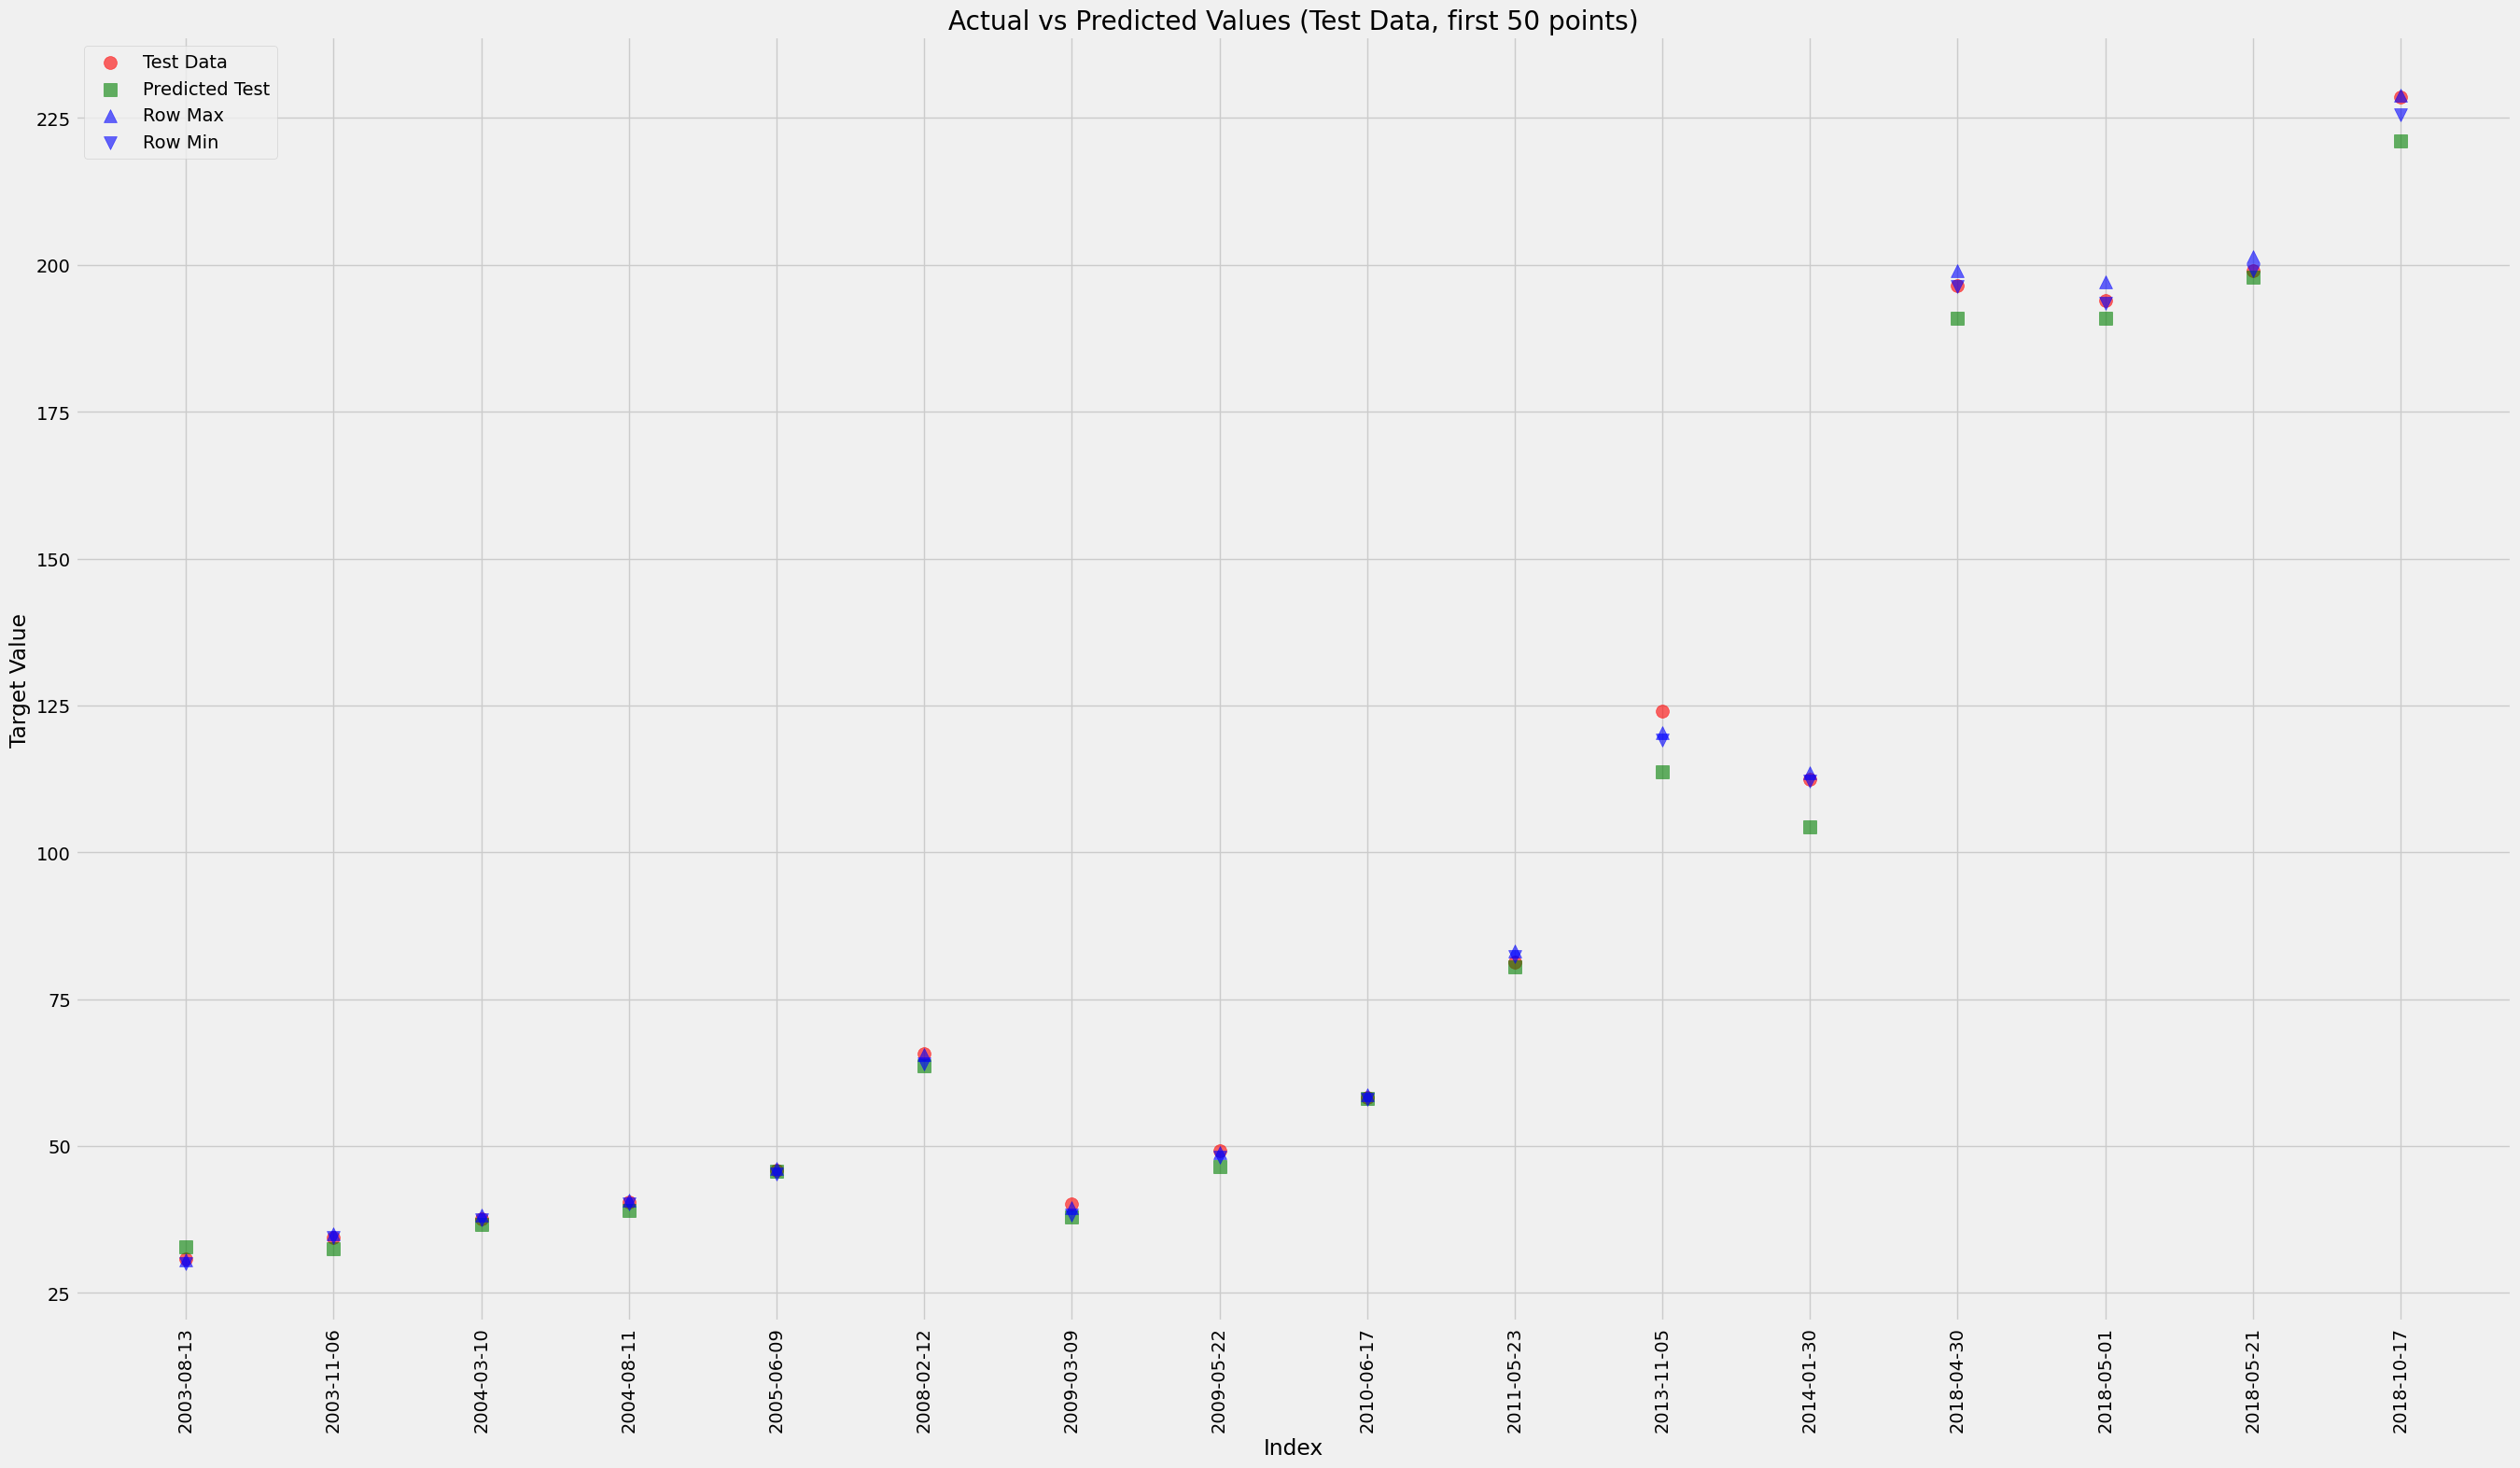

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='blue', label='Row Min', alpha=0.6, marker='v', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Prepare DataFrames/Series for plotting
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Assuming Row_Max and Row_Min are columns in X_test
max_values = X_test_subset['Row_Max']
min_values = X_test_subset['Row_Min']

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset,
    'Max': max_values,
    'Min': min_values,
})

paired_data_50

,Actual,Predicted,Max,Min
date-5,,,,
2003-08-13,30.850000,32.796307,30.559999,30.000000
2003-11-06,34.490002,32.533974,35.020000,34.400002
2004-03-10,37.630001,36.646793,38.189999,37.369999
2004-08-11,40.490002,39.055363,40.849998,40.160000
2005-06-09,45.810001,45.632099,46.250000,45.250000
2008-02-12,65.680000,63.677170,65.540001,64.010002
2009-03-09,40.139999,37.852943,39.470001,38.180000
2009-05-22,49.139999,46.425789,48.830002,48.070000
2010-06-17,58.209999,58.033337,58.720001,57.990002
